In [27]:
import glob
import pandas as pd
dir_val = '/Users/josh/Documents/Harvard'
glb = glob.glob(f'{dir_val}/figure_outputs/*')
glb = [(_, _.split('/')[-1]) for _ in glb]
avg_glb = sorted([(_[0], _[1].replace('average_response_reconstruction_','')) for _ in glb if 'average_response' in _[1]])
beta_glb = sorted([(_[0], _[1]) for _ in glb if not 'average_response' in _[1]])

In [28]:
avg_glb

[('/Users/josh/Documents/Harvard/figure_outputs/average_response_reconstruction_dlight_only_WT36L_12172020_max_iter_1000_fit_intercept_True_alpha_0.001_l1_ratio_0.0.png',
  'dlight_only_WT36L_12172020_max_iter_1000_fit_intercept_True_alpha_0.001_l1_ratio_0.0.png'),
 ('/Users/josh/Documents/Harvard/figure_outputs/average_response_reconstruction_dlight_only_WT36L_12172020_max_iter_1000_fit_intercept_True_alpha_0.001_l1_ratio_0.001.png',
  'dlight_only_WT36L_12172020_max_iter_1000_fit_intercept_True_alpha_0.001_l1_ratio_0.001.png'),
 ('/Users/josh/Documents/Harvard/figure_outputs/average_response_reconstruction_dlight_only_WT36L_12172020_max_iter_1000_fit_intercept_True_alpha_0.001_l1_ratio_0.01.png',
  'dlight_only_WT36L_12172020_max_iter_1000_fit_intercept_True_alpha_0.001_l1_ratio_0.01.png'),
 ('/Users/josh/Documents/Harvard/figure_outputs/average_response_reconstruction_dlight_only_WT36L_12172020_max_iter_1000_fit_intercept_True_alpha_0.001_l1_ratio_0.1.png',
  'dlight_only_WT36L_1217

In [29]:
def underscores_to_equals(string):
    stringsplt = string.split('_max_iter')
    string = '_max_iter'.join(['fn='+stringsplt[0].replace('_','-'), stringsplt[1]])
    for keyword in ['max_iter', 'fit_intercept', 'alpha', 'l1_ratio', 'coeffs_R2']:
        keyword2 = keyword.replace('_', '-')
        string = string.replace(f'_{keyword}_',f'_{keyword2}=')
    return string

In [30]:
underscores_to_equals(avg_glb[0][1]), underscores_to_equals(beta_glb[0][1])

('fn=dlight-only-WT36L-12172020_max-iter=1000_fit-intercept=True_alpha=0.001_l1-ratio=0.0.png',
 'fn=dlight-only-WT36L-12172020-dlight-only-WT36L-12172020_max-iter=1000_fit-intercept=True_alpha=0.001_l1-ratio=0.001_coeffs-R2=0.8649.png')

In [31]:
avg_glb = [(_[0],underscores_to_equals(_[1]).split('_')) for _ in avg_glb]
beta_glb = [(_[0],underscores_to_equals(_[1]).split('_')) for _ in beta_glb]

In [32]:
def equals_lst_to_dict(file, lst):
    out = {'full_fn': file}
    for entry in lst:
        entry = entry.split('=')
        out[entry[0]] = entry[1].replace('.png', '').replace('True', '1').replace('False', '0')
    return out

avg_df = pd.DataFrame([(equals_lst_to_dict(_[0], _[1])) for _ in avg_glb])
avg_df[['alpha', 'l1-ratio', 'fit-intercept', 'max-iter']] = avg_df[['alpha', 'l1-ratio', 'fit-intercept', 'max-iter']].astype(float)
beta_df = pd.DataFrame([equals_lst_to_dict(_[0], _[1]) for _ in beta_glb])
beta_df[['alpha', 'l1-ratio', 'fit-intercept', 'max-iter']] = beta_df[['alpha', 'l1-ratio', 'fit-intercept', 'max-iter']].astype(float)
beta_df['fn'] = beta_df['fn'].apply(lambda x: x[:len(x)//2])

In [33]:
beta_df['join'] = beta_df.apply(lambda x: f'{x["fn"]}_{x["alpha"]}_{x["l1-ratio"]}_{x["fit-intercept"]}_{x["max-iter"]}', axis=1)
avg_df['join'] = avg_df.apply(lambda x: f'{x["fn"]}_{x["alpha"]}_{x["l1-ratio"]}_{x["fit-intercept"]}_{x["max-iter"]}', axis=1)

In [34]:
import numpy as np
with pd.option_context('max_rows',1000):
    # display(beta_df.sort_values(['fn','coeffs-R2'], ascending=False))
    pass

best_betas = beta_df[(beta_df['coeffs-R2'] == beta_df.groupby('fn')['coeffs-R2'].transform(np.max))]

In [60]:
best_betas

,full_fn,fn,max-iter,fit-intercept,alpha,l1-ratio,coeffs-R2,join
5,/Users/josh/Documents/Harvard/figure_outputs/d...,dlight-only-WT36L-12172020,1000.0,1.0,0.001,0.000,0.8864,dlight-only-WT36L-12172020_0.001_0.0_1.0_1000.0
19,/Users/josh/Documents/Harvard/figure_outputs/d...,dlight-only-WT36L-12172020,1000.0,1.0,0.010,0.000,0.8864,dlight-only-WT36L-12172020_0.01_0.0_1.0_1000.0
29,/Users/josh/Documents/Harvard/figure_outputs/d...,dlight-only-WT36L-12172020,1000.0,1.0,0.000,0.001,0.8864,dlight-only-WT36L-12172020_0.0_0.001_1.0_1000.0
31,/Users/josh/Documents/Harvard/figure_outputs/d...,dlight-only-WT36L-12172020,1000.0,1.0,0.000,0.010,0.8864,dlight-only-WT36L-12172020_0.0_0.01_1.0_1000.0
33,/Users/josh/Documents/Harvard/figure_outputs/d...,dlight-only-WT36L-12172020,1000.0,1.0,0.000,0.000,0.8864,dlight-only-WT36L-12172020_0.0_0.0_1.0_1000.0
35,/Users/josh/Documents/Harvard/figure_outputs/d...,dlight-only-WT36L-12172020,1000.0,1.0,0.000,0.100,0.8864,dlight-only-WT36L-12172020_0.0_0.1_1.0_1000.0
37,/Users/josh/Documents/Harvard/figure_outputs/d...,dlight-only-WT36L-12172020,1000.0,1.0,0.000,0.500,0.8864,dlight-only-WT36L-12172020_0.0_0.5_1.0_1000.0
39,/Users/josh/Documents/Harvard/figure_outputs/d...,dlight-only-WT36L-12172020,1000.0,1.0,0.000,0.900,0.8864,dlight-only-WT36L-12172020_0.0_0.9_1.0_1000.0
41,/Users/josh/Documents/Harvard/figure_outputs/d...,dlight-only-WT36L-12172020,1000.0,1.0,0.000,1.000,0.8864,dlight-only-WT36L-12172020_0.0_1.0_1.0_1000.0
47,/Users/josh/Documents/Harvard/figure_outputs/d...,dlight-only-WT36L-12172020,1000.0,1.0,0.100,0.000,0.8864,dlight-only-WT36L-12172020_0.1_0.0_1.0_1000.0


In [61]:
best_avg = avg_df[avg_df['join'].isin(best_betas['join'])]

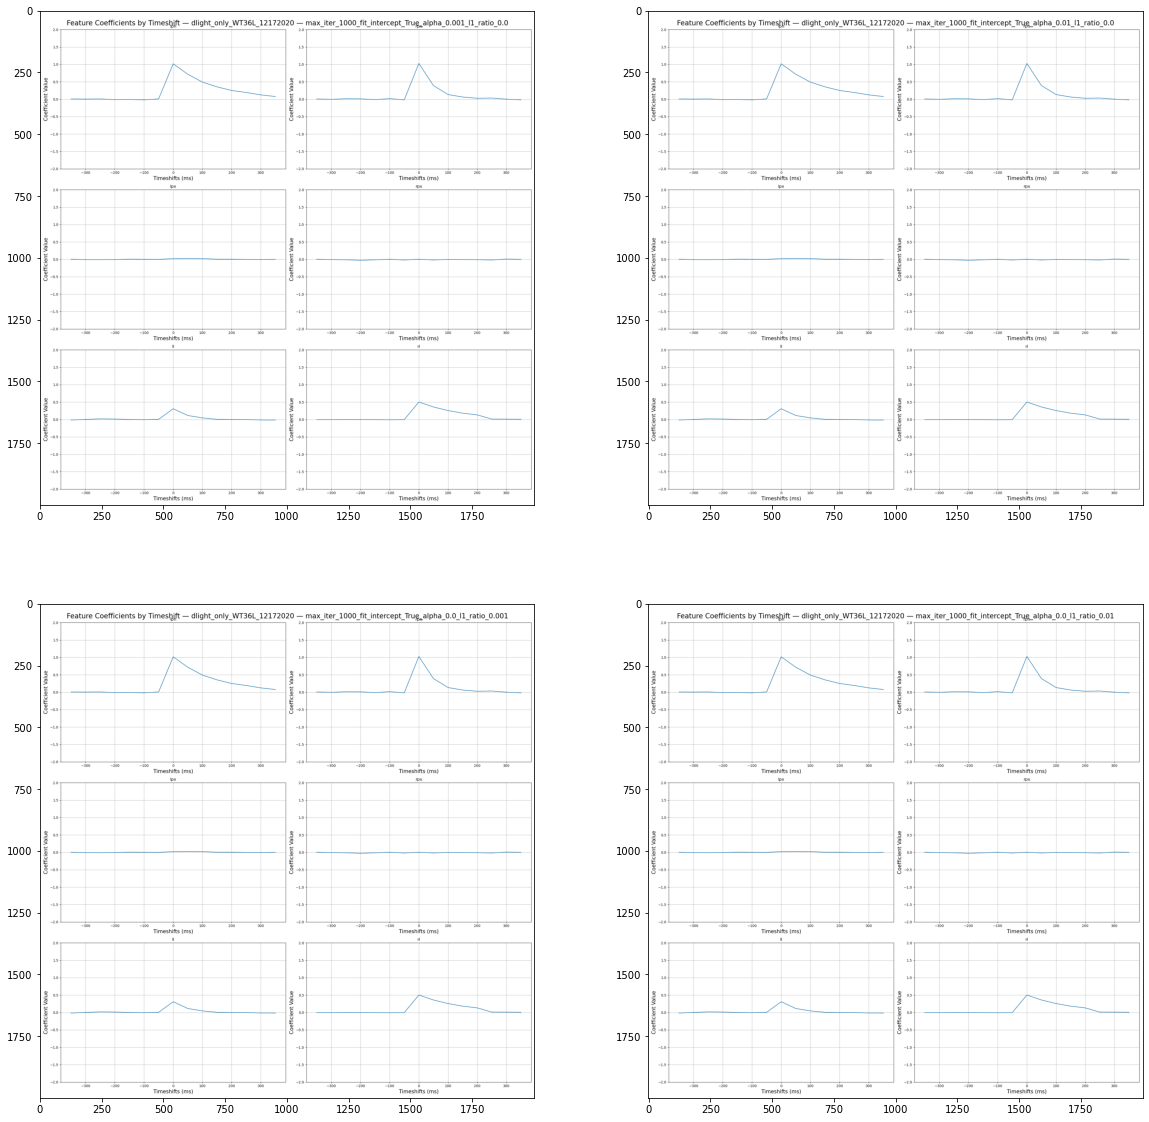

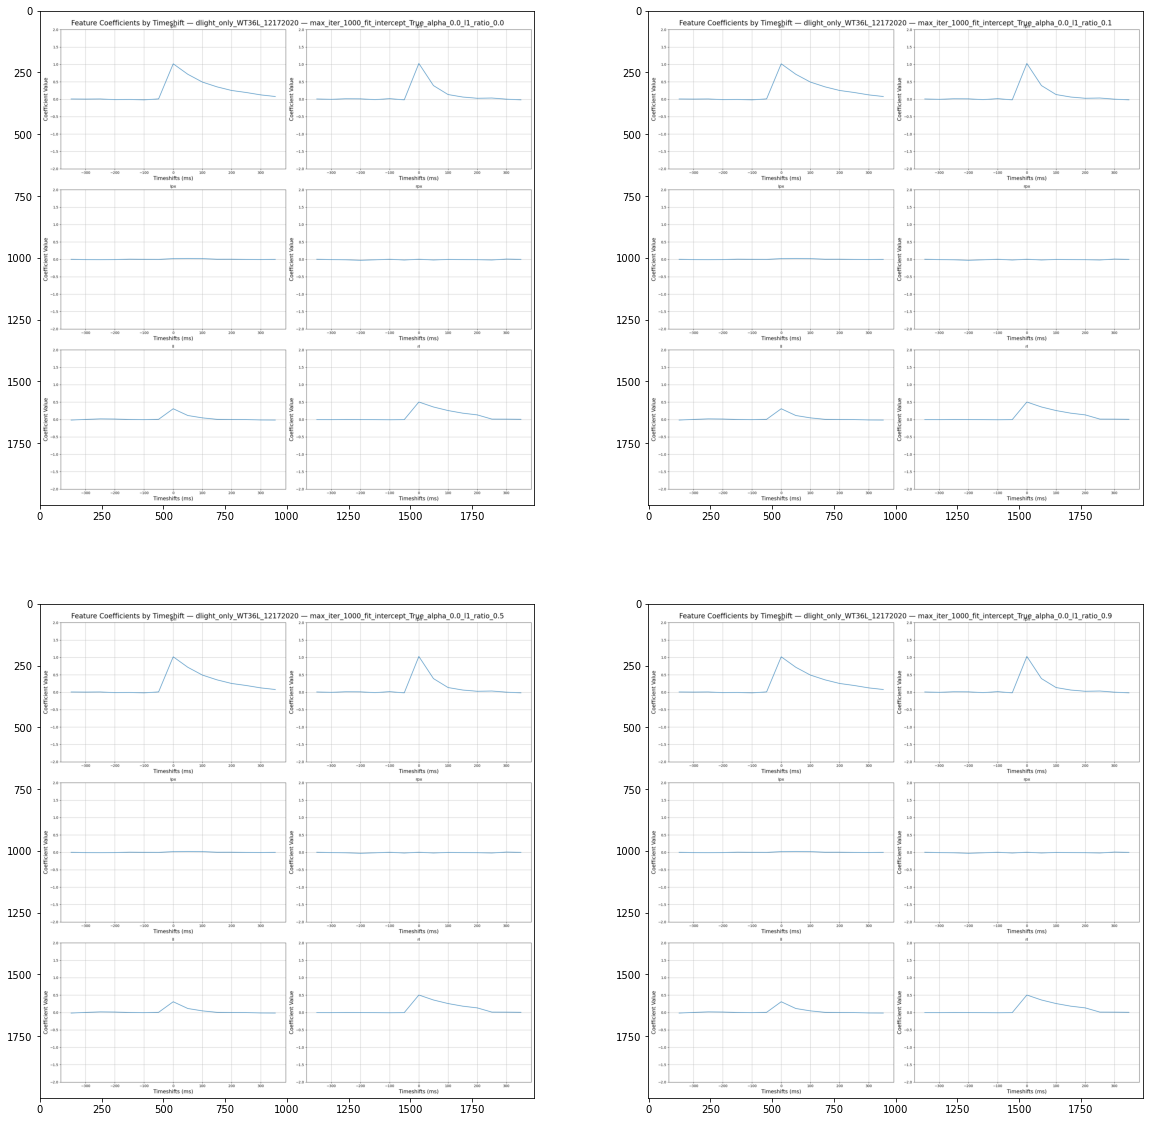

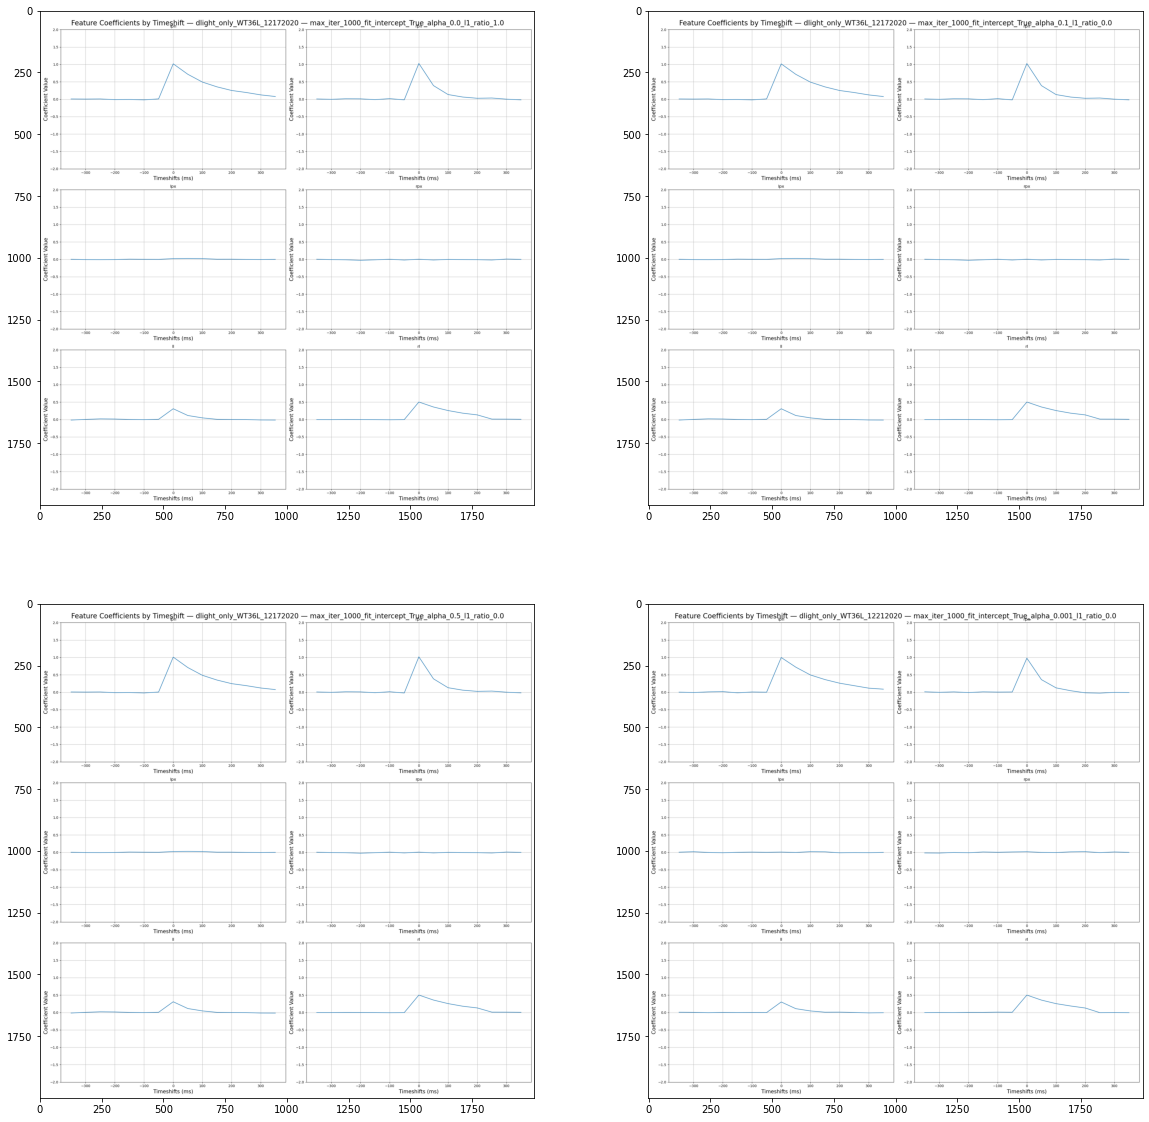

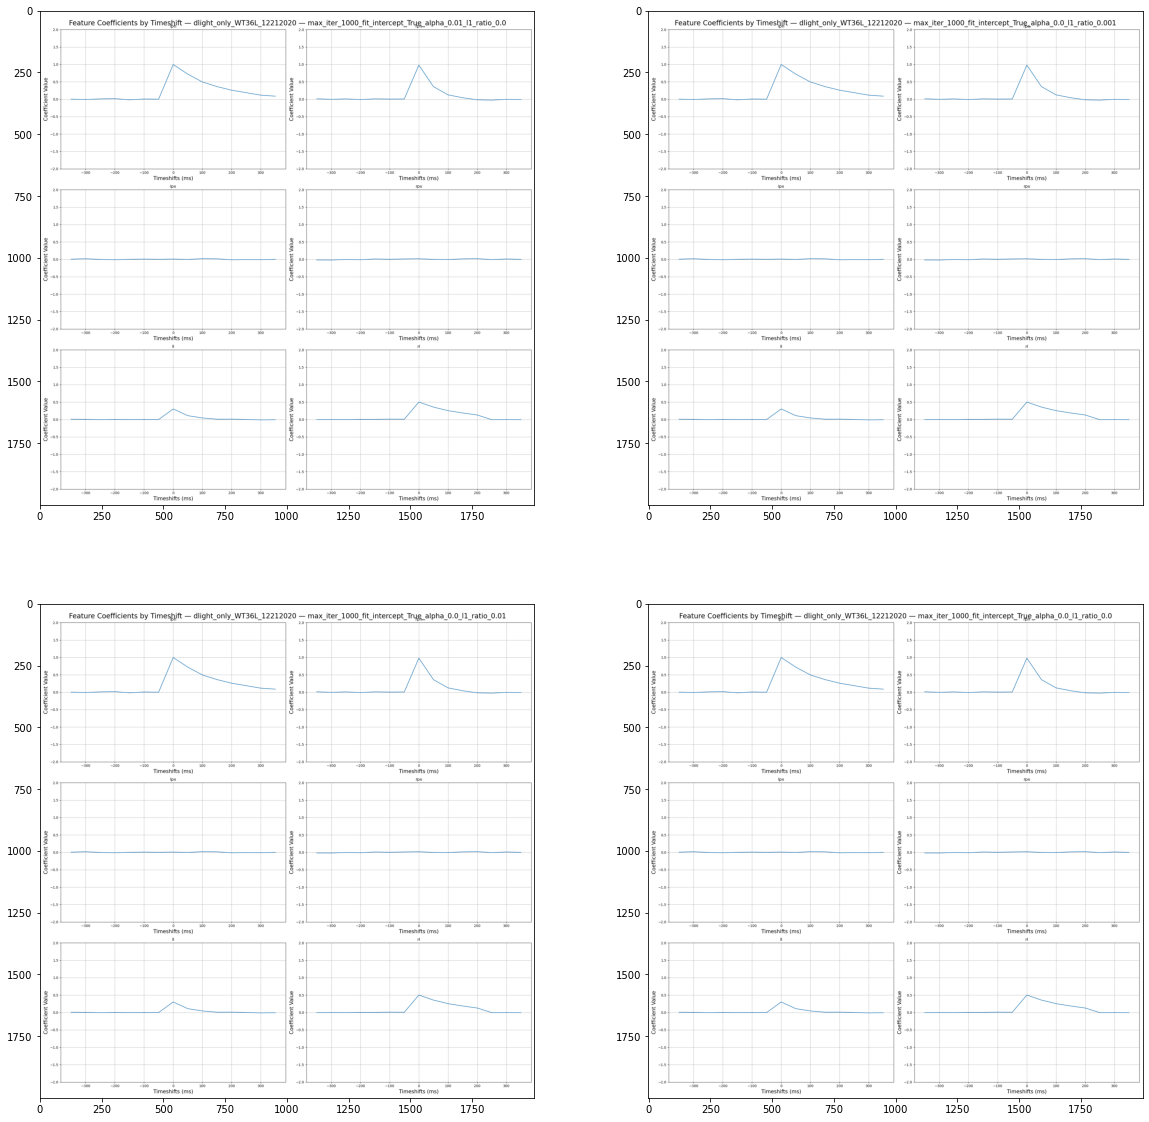

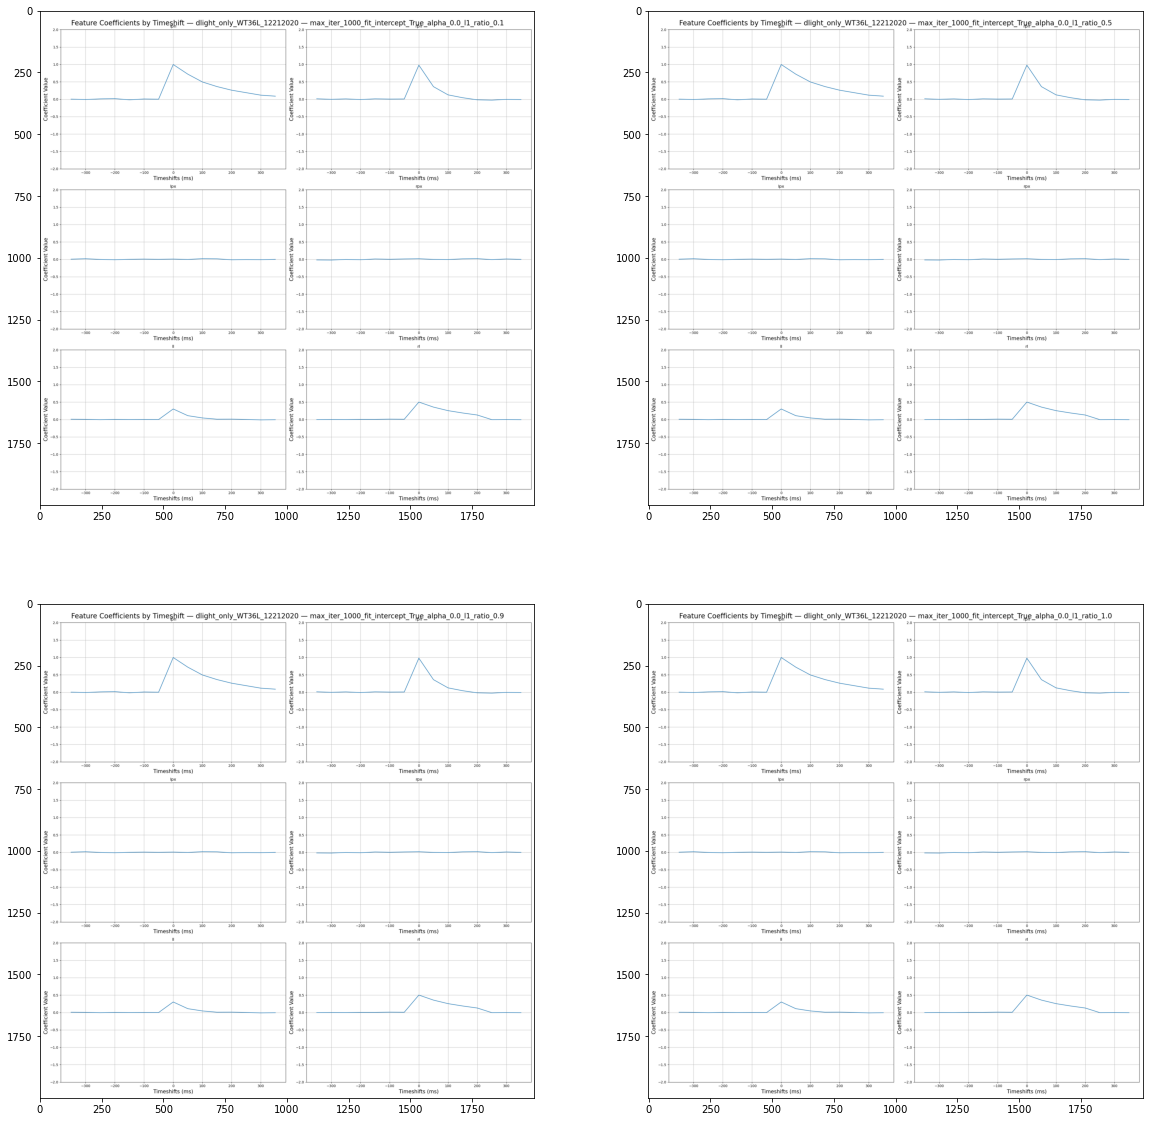

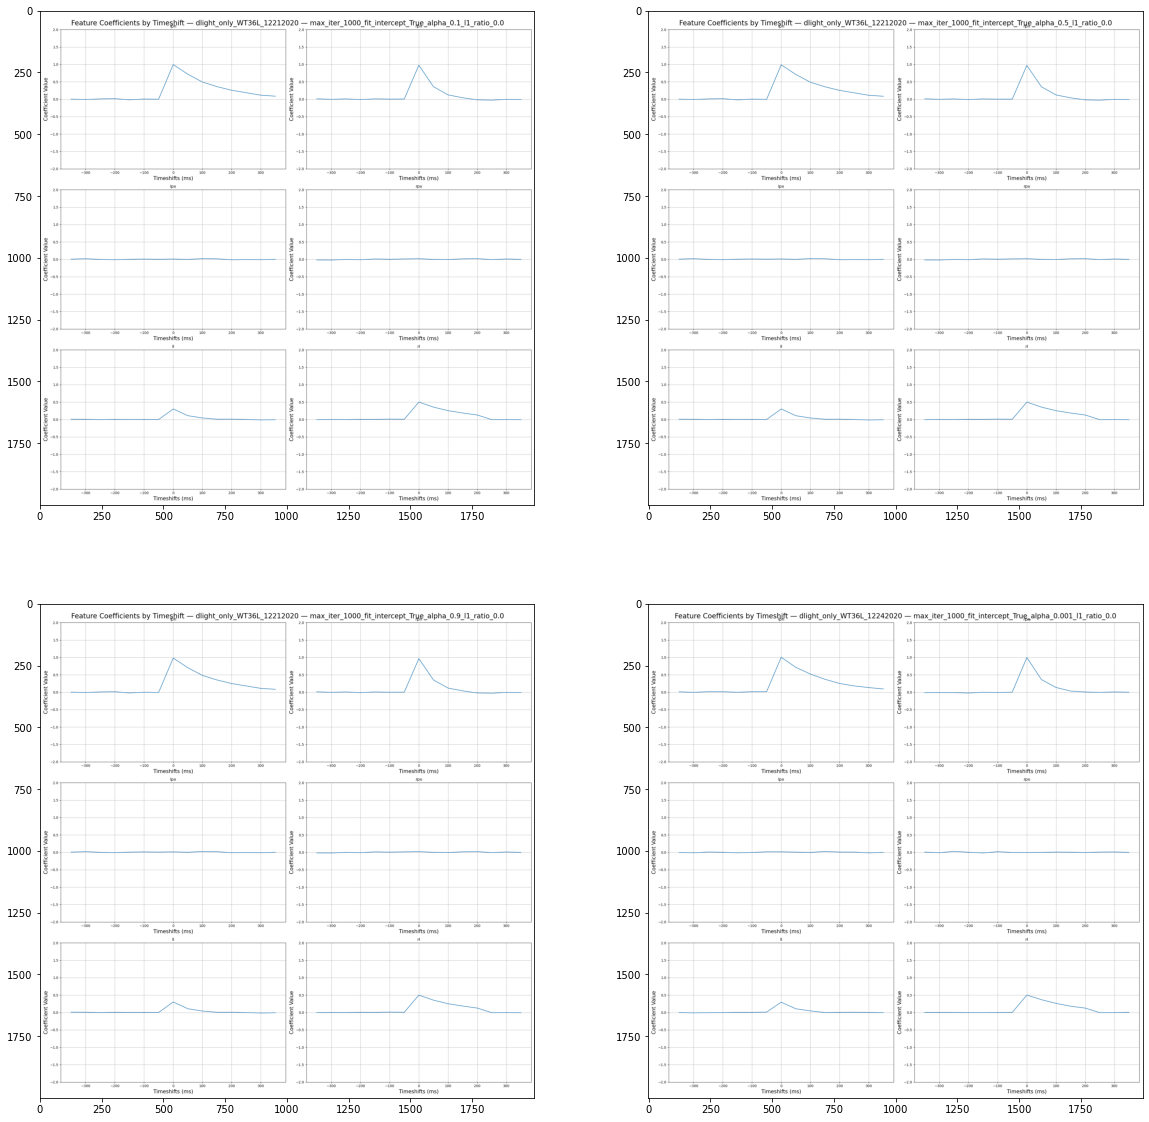

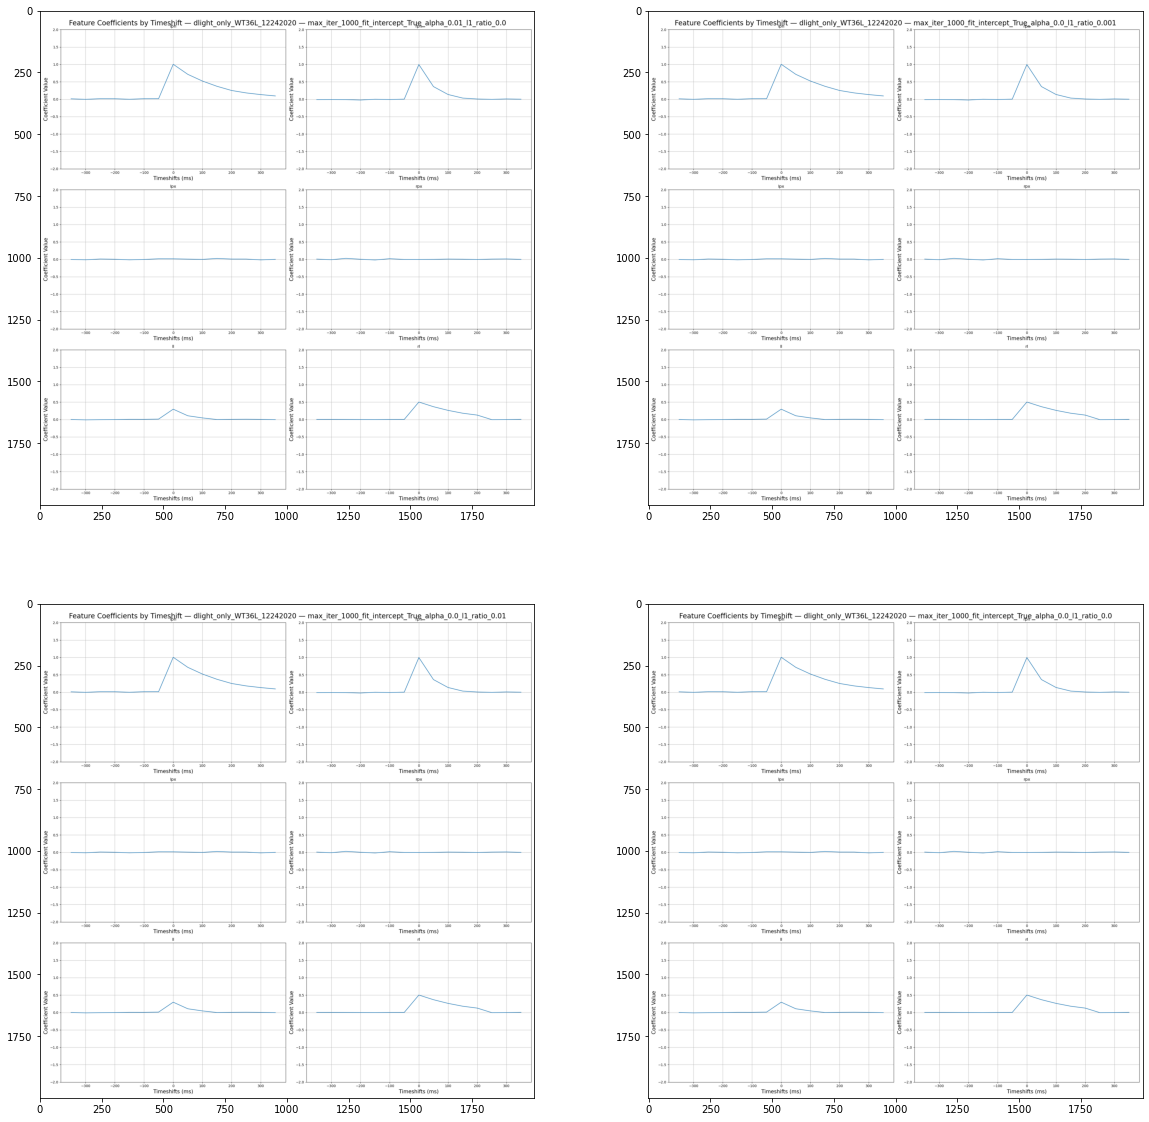

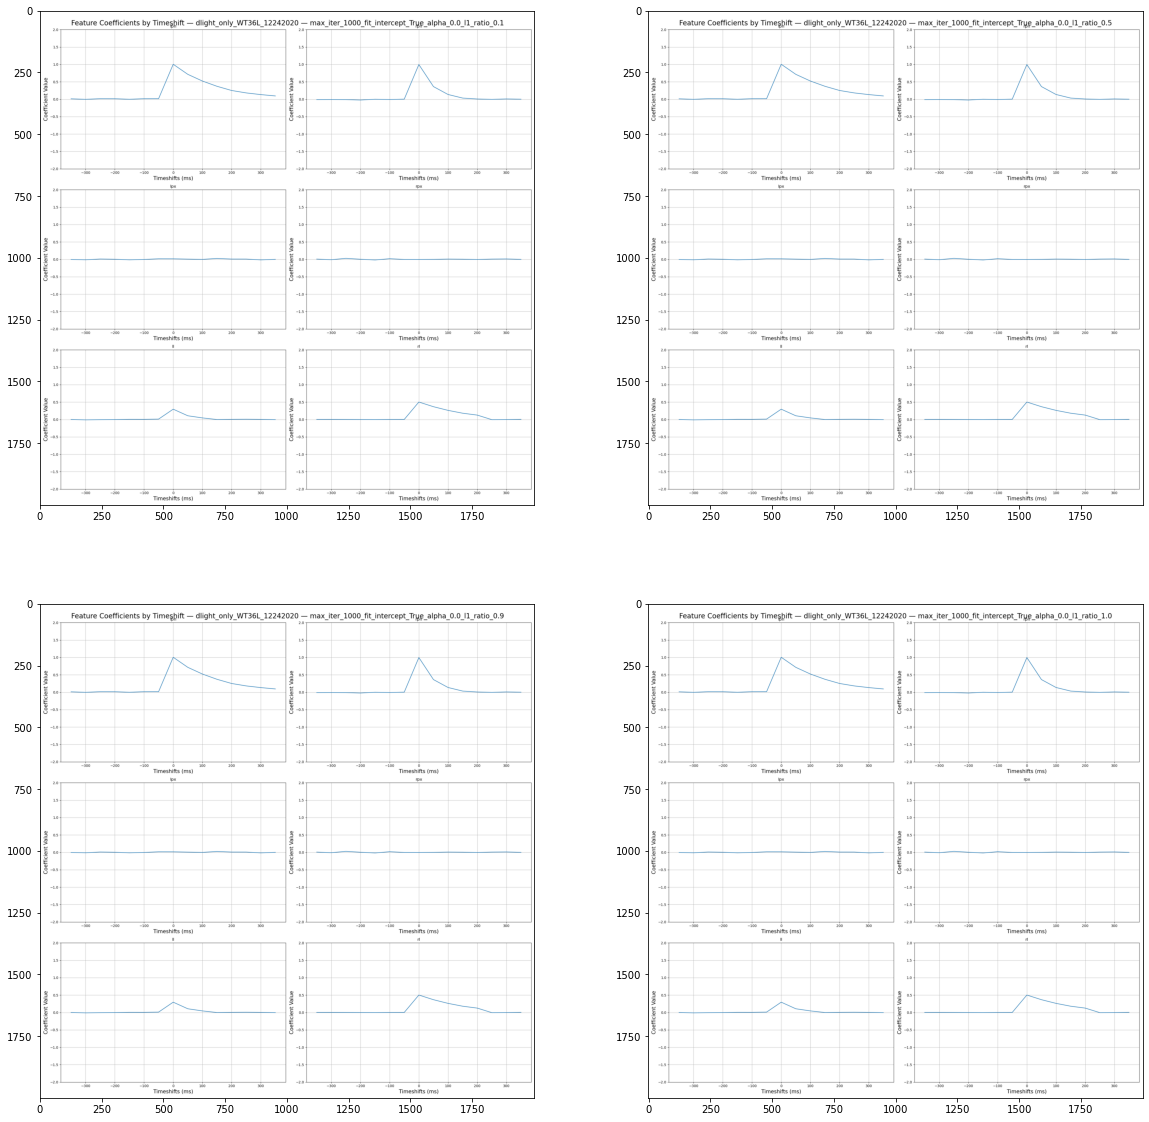

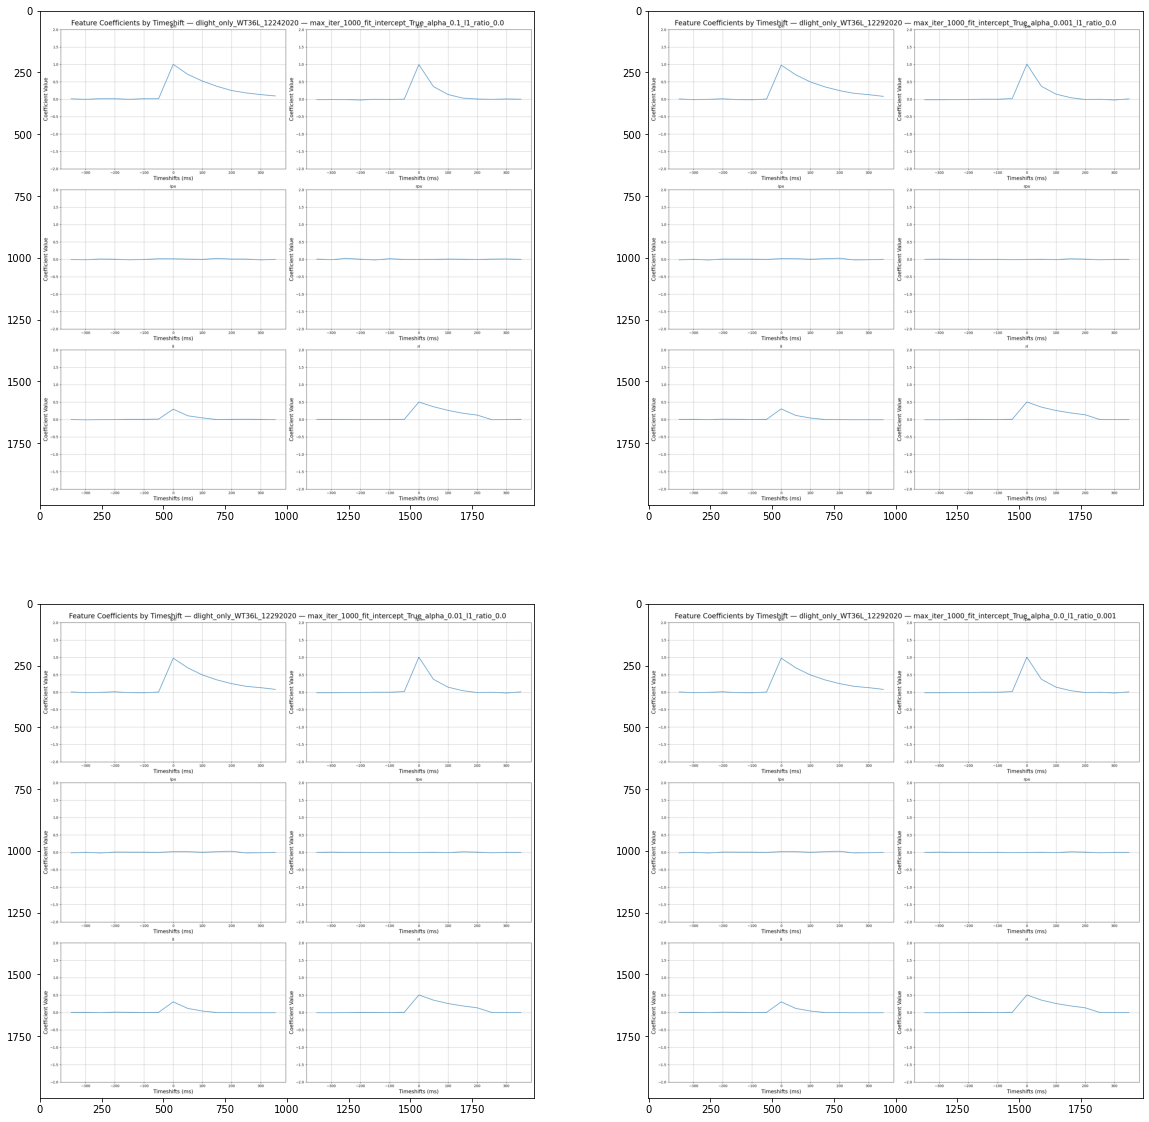

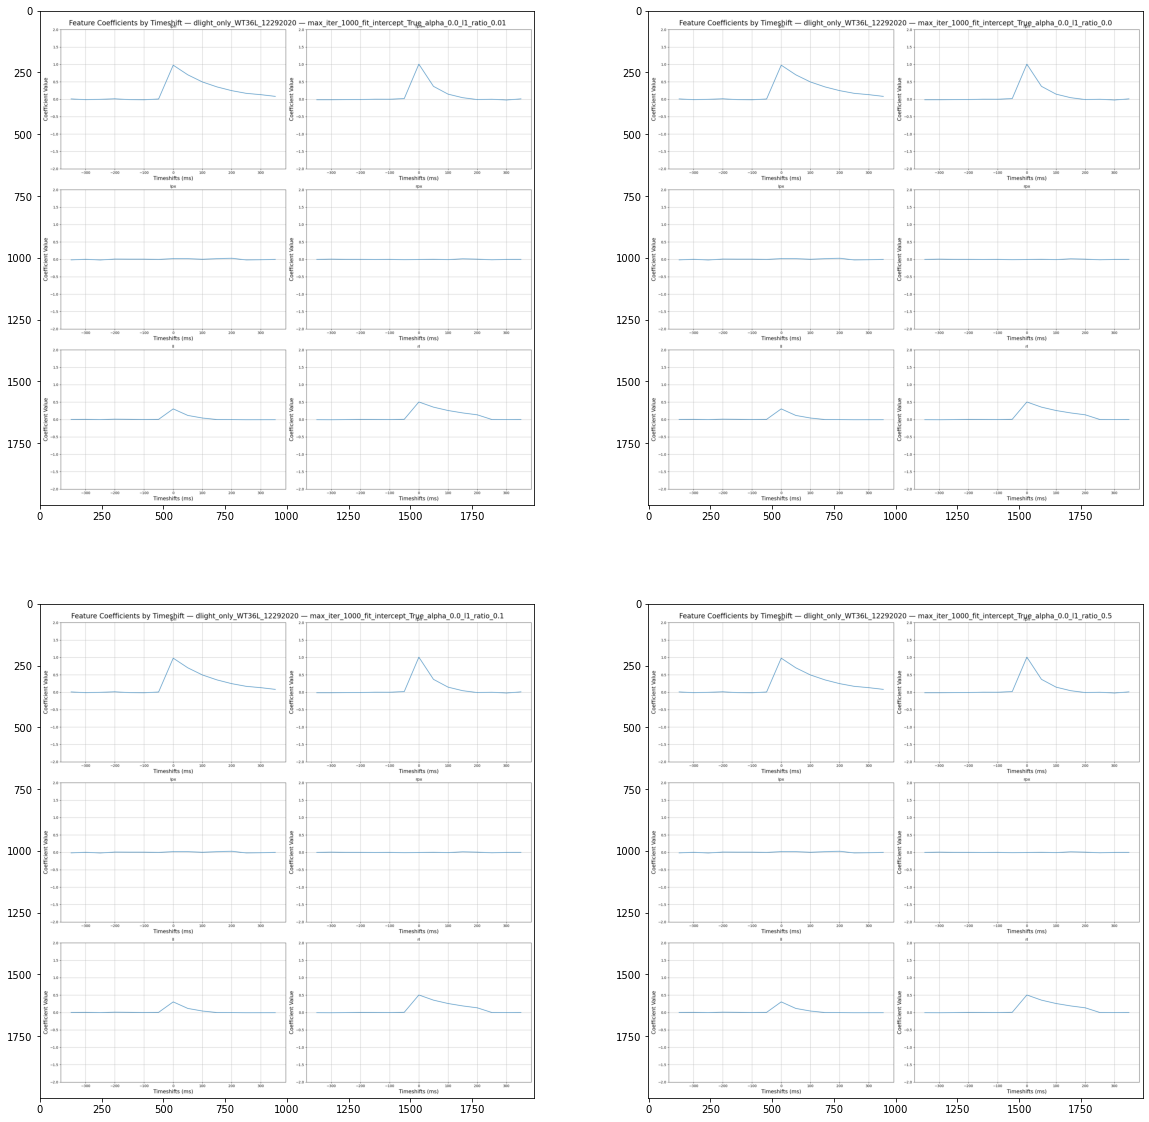

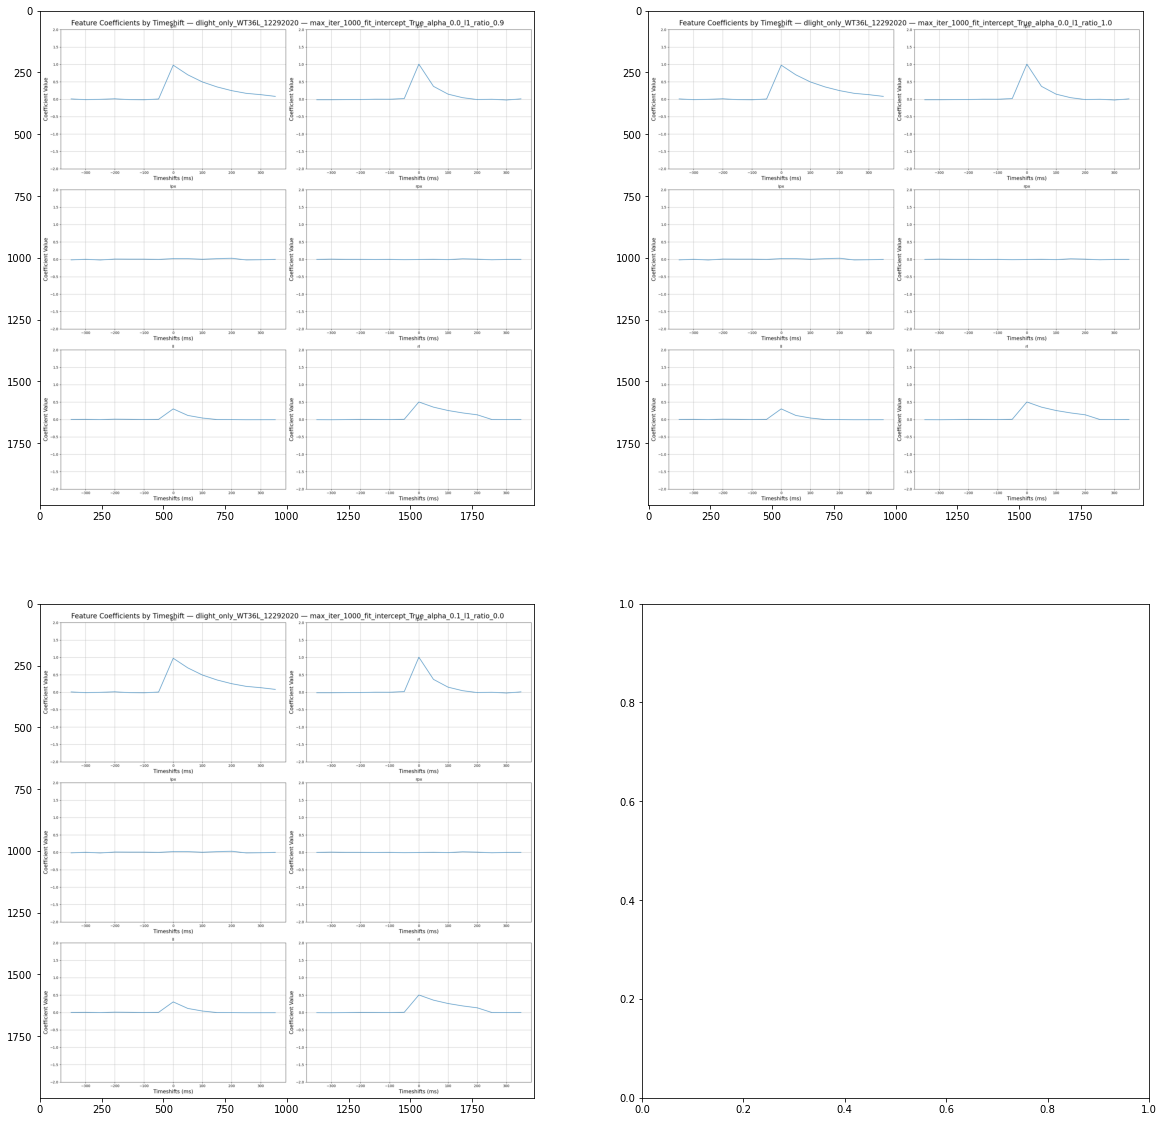

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
counter = -1
for ibf, beta_fn in enumerate(sorted(best_betas['full_fn'])):
    if ibf%4 == 0:
        if ibf != 0:
            plt.show()
        fig,ax = plt.subplots(2, 2,figsize=(20,20))
        counter += 1
    else:
        pass

    img = mpimg.imread(beta_fn)
    ax[ibf//2 - counter*2, ibf%2].imshow(img)

    # if ibf >= 7:
    #     break

In [77]:
best_betas['fn'].unique()

array(['dlight-only-WT36L-12172020', 'dlight-only-WT36L-12212020',
       'dlight-only-WT36L-12242020', 'dlight-only-WT36L-12292020'],
      dtype=object)

In [ ]:
WT36L_12242020

/Users/josh/Documents/Harvard/figure_outputs/average_response_reconstruction_dlight_only_WT36L_12212020_max_iter_1000_fit_intercept_True_alpha_0.001_l1_ratio_0.0.png
/Users/josh/Documents/Harvard/figure_outputs/average_response_reconstruction_dlight_only_WT36L_12212020_max_iter_1000_fit_intercept_True_alpha_0.0_l1_ratio_0.01.png


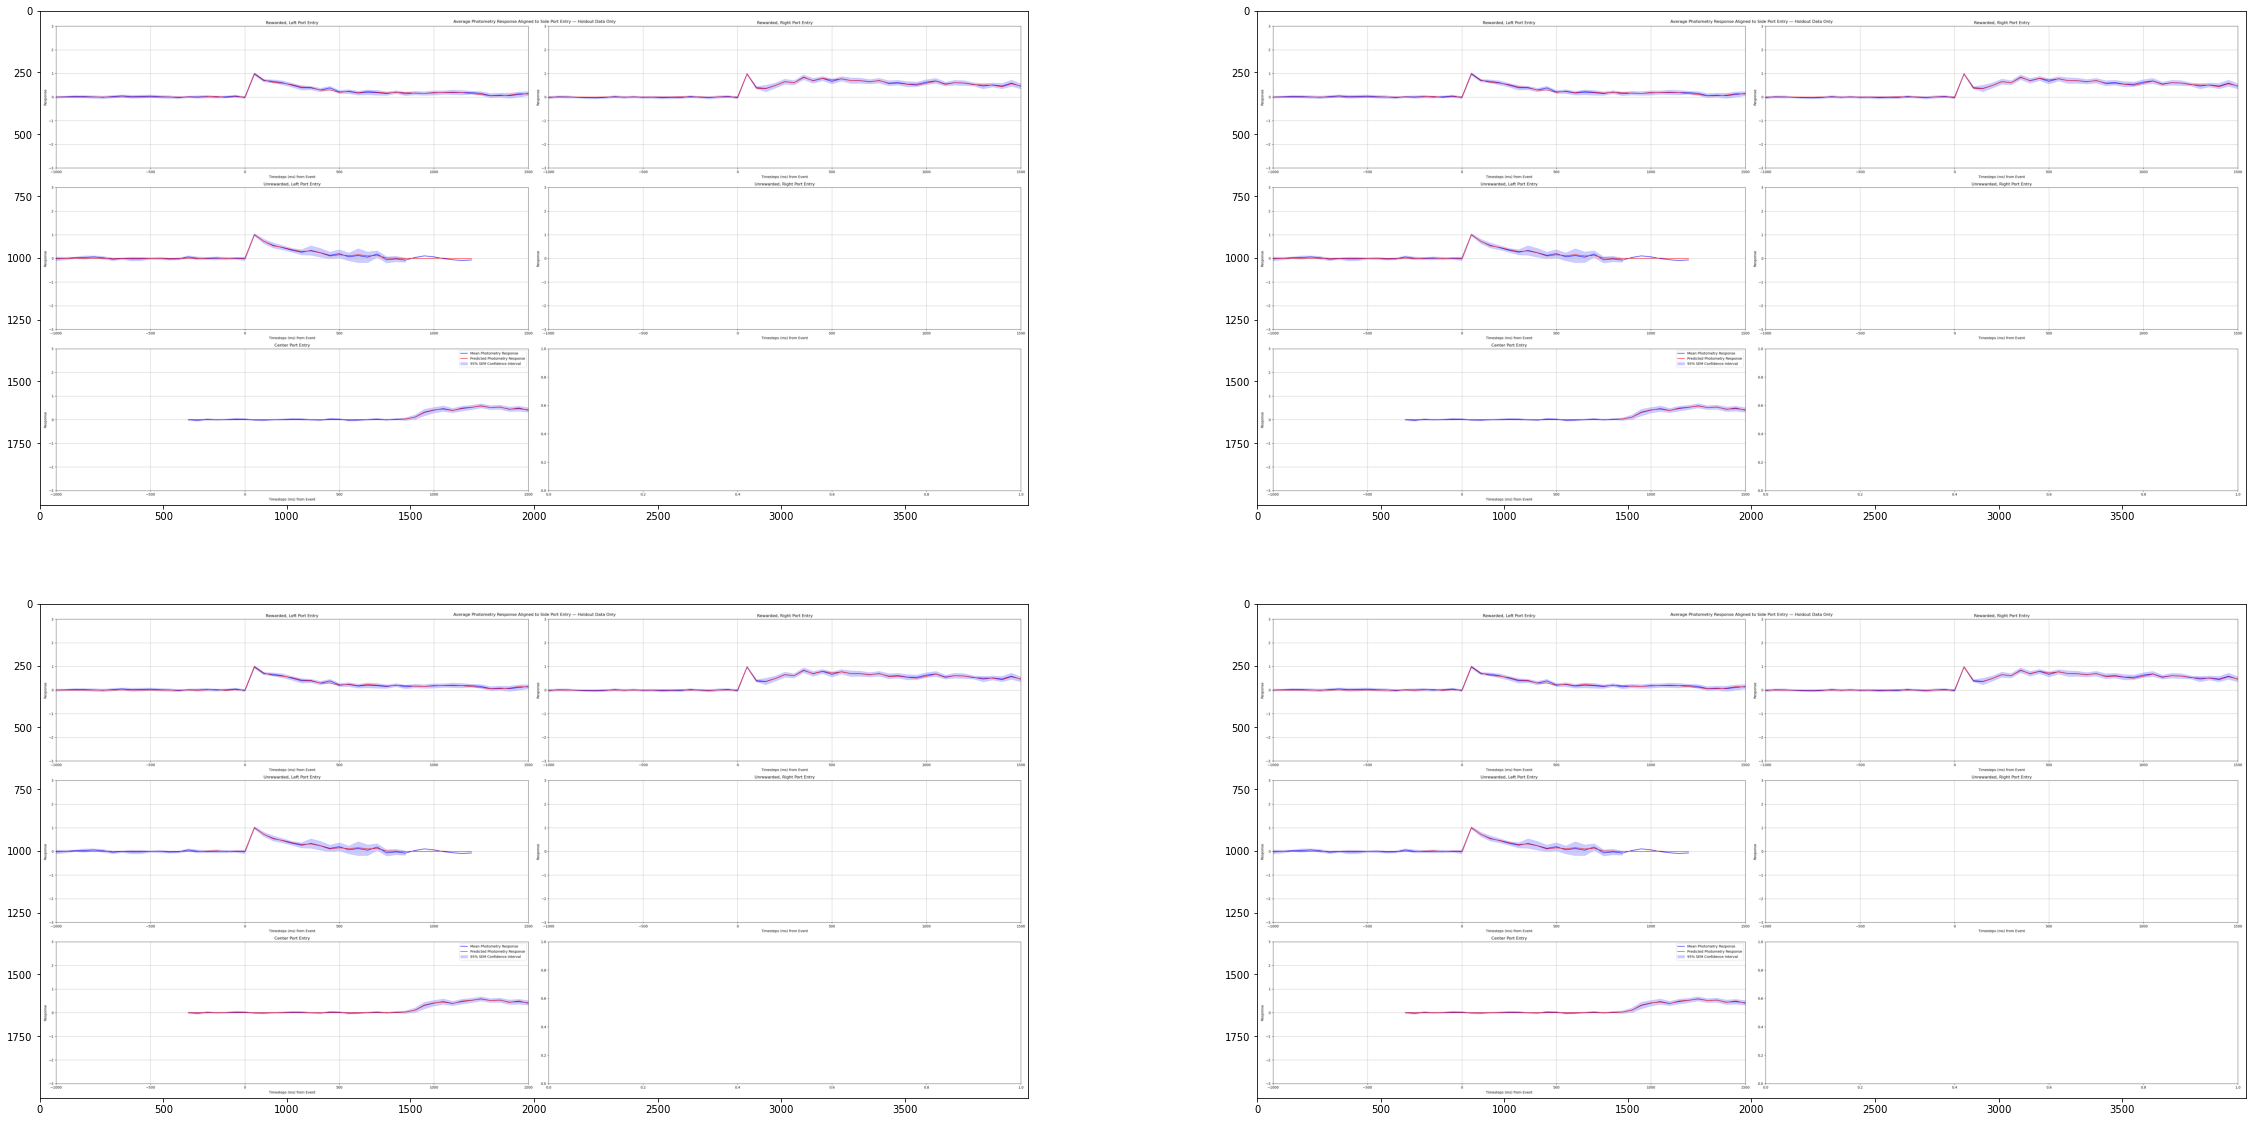

/Users/josh/Documents/Harvard/figure_outputs/average_response_reconstruction_dlight_only_WT36L_12212020_max_iter_1000_fit_intercept_True_alpha_0.0_l1_ratio_1.0.png


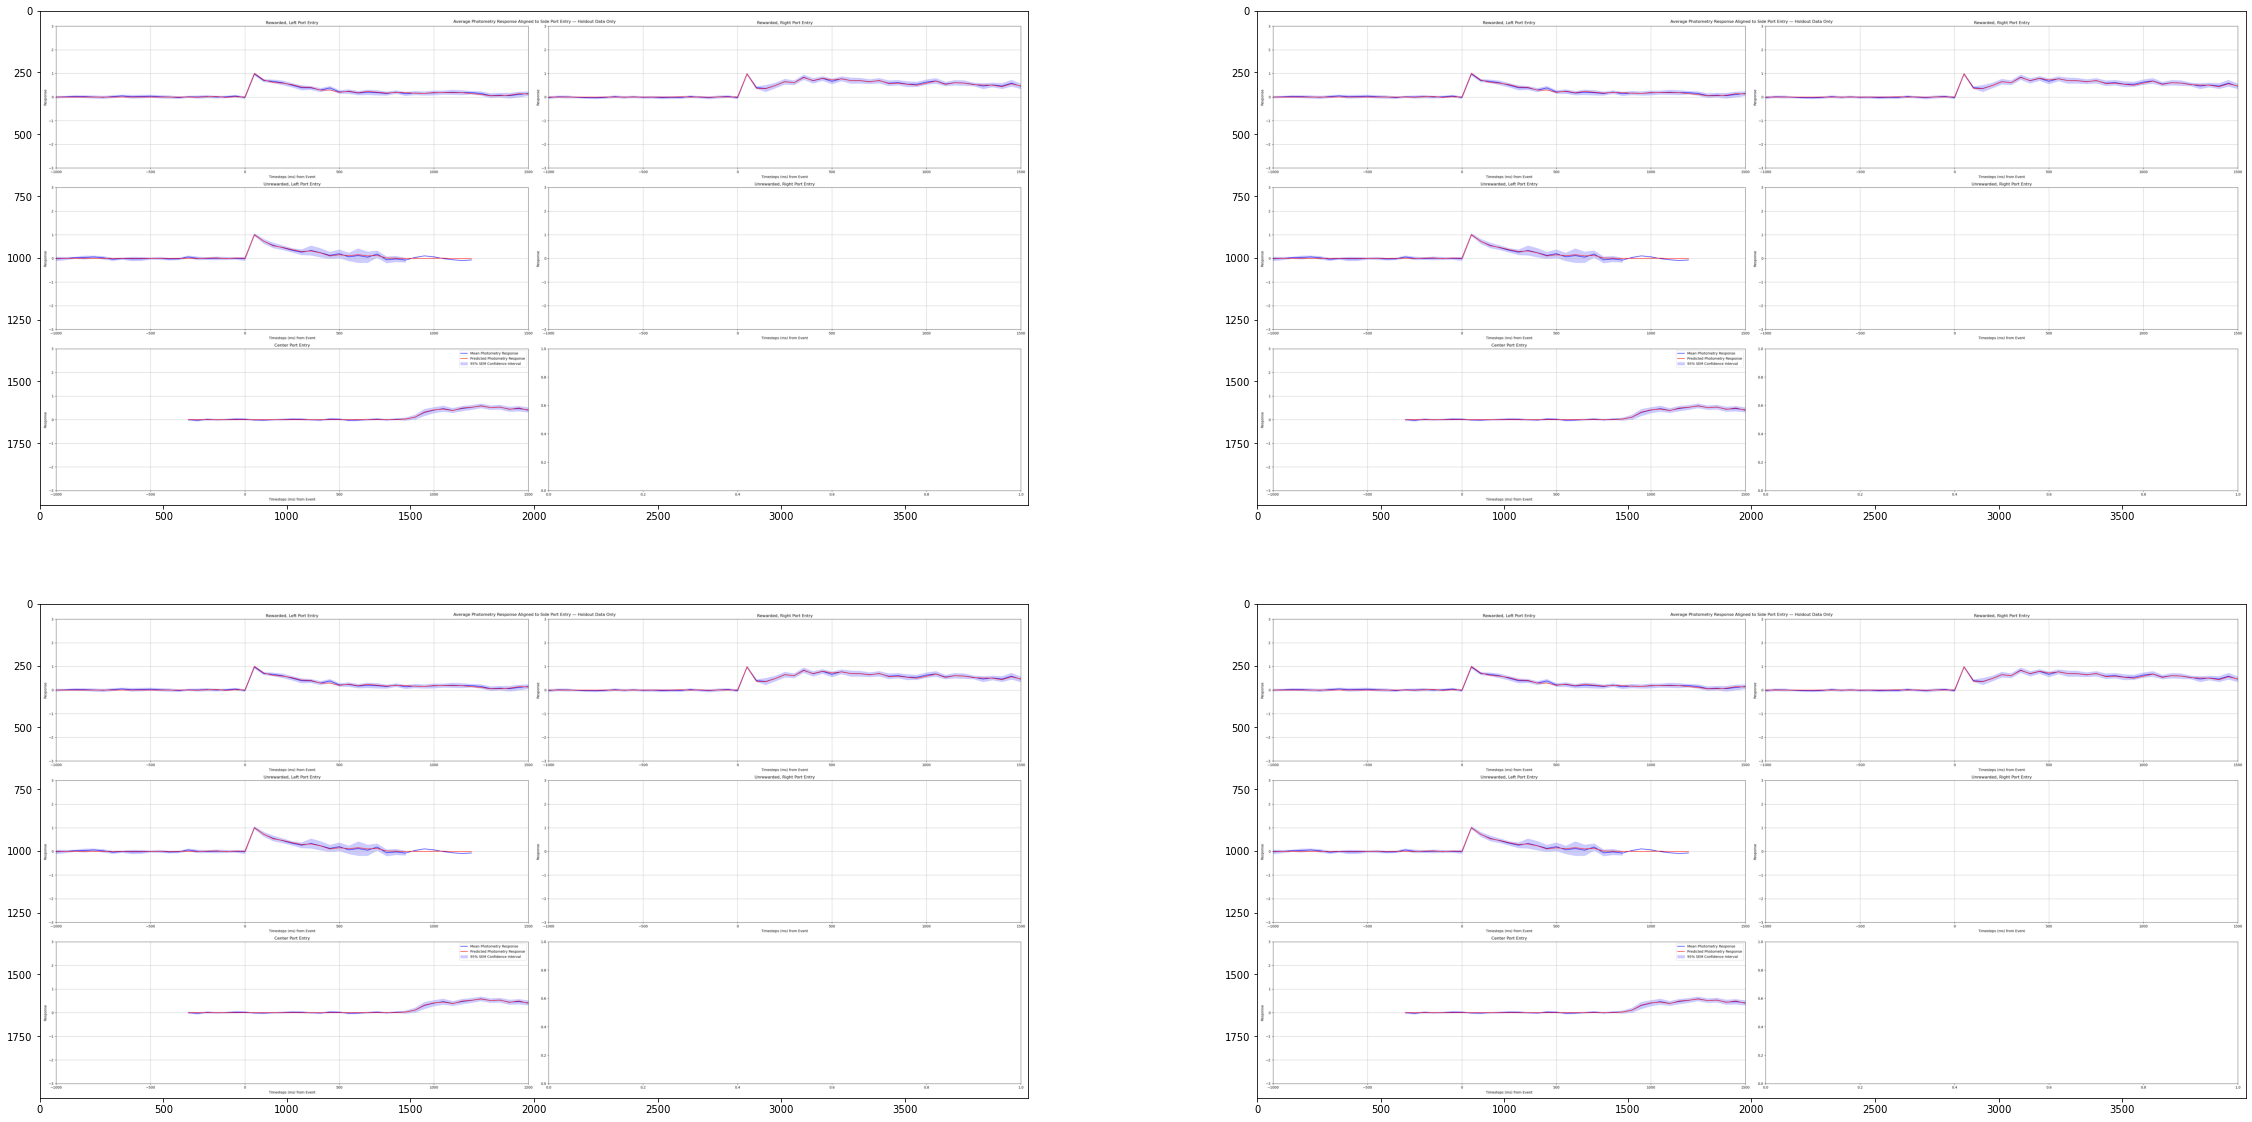

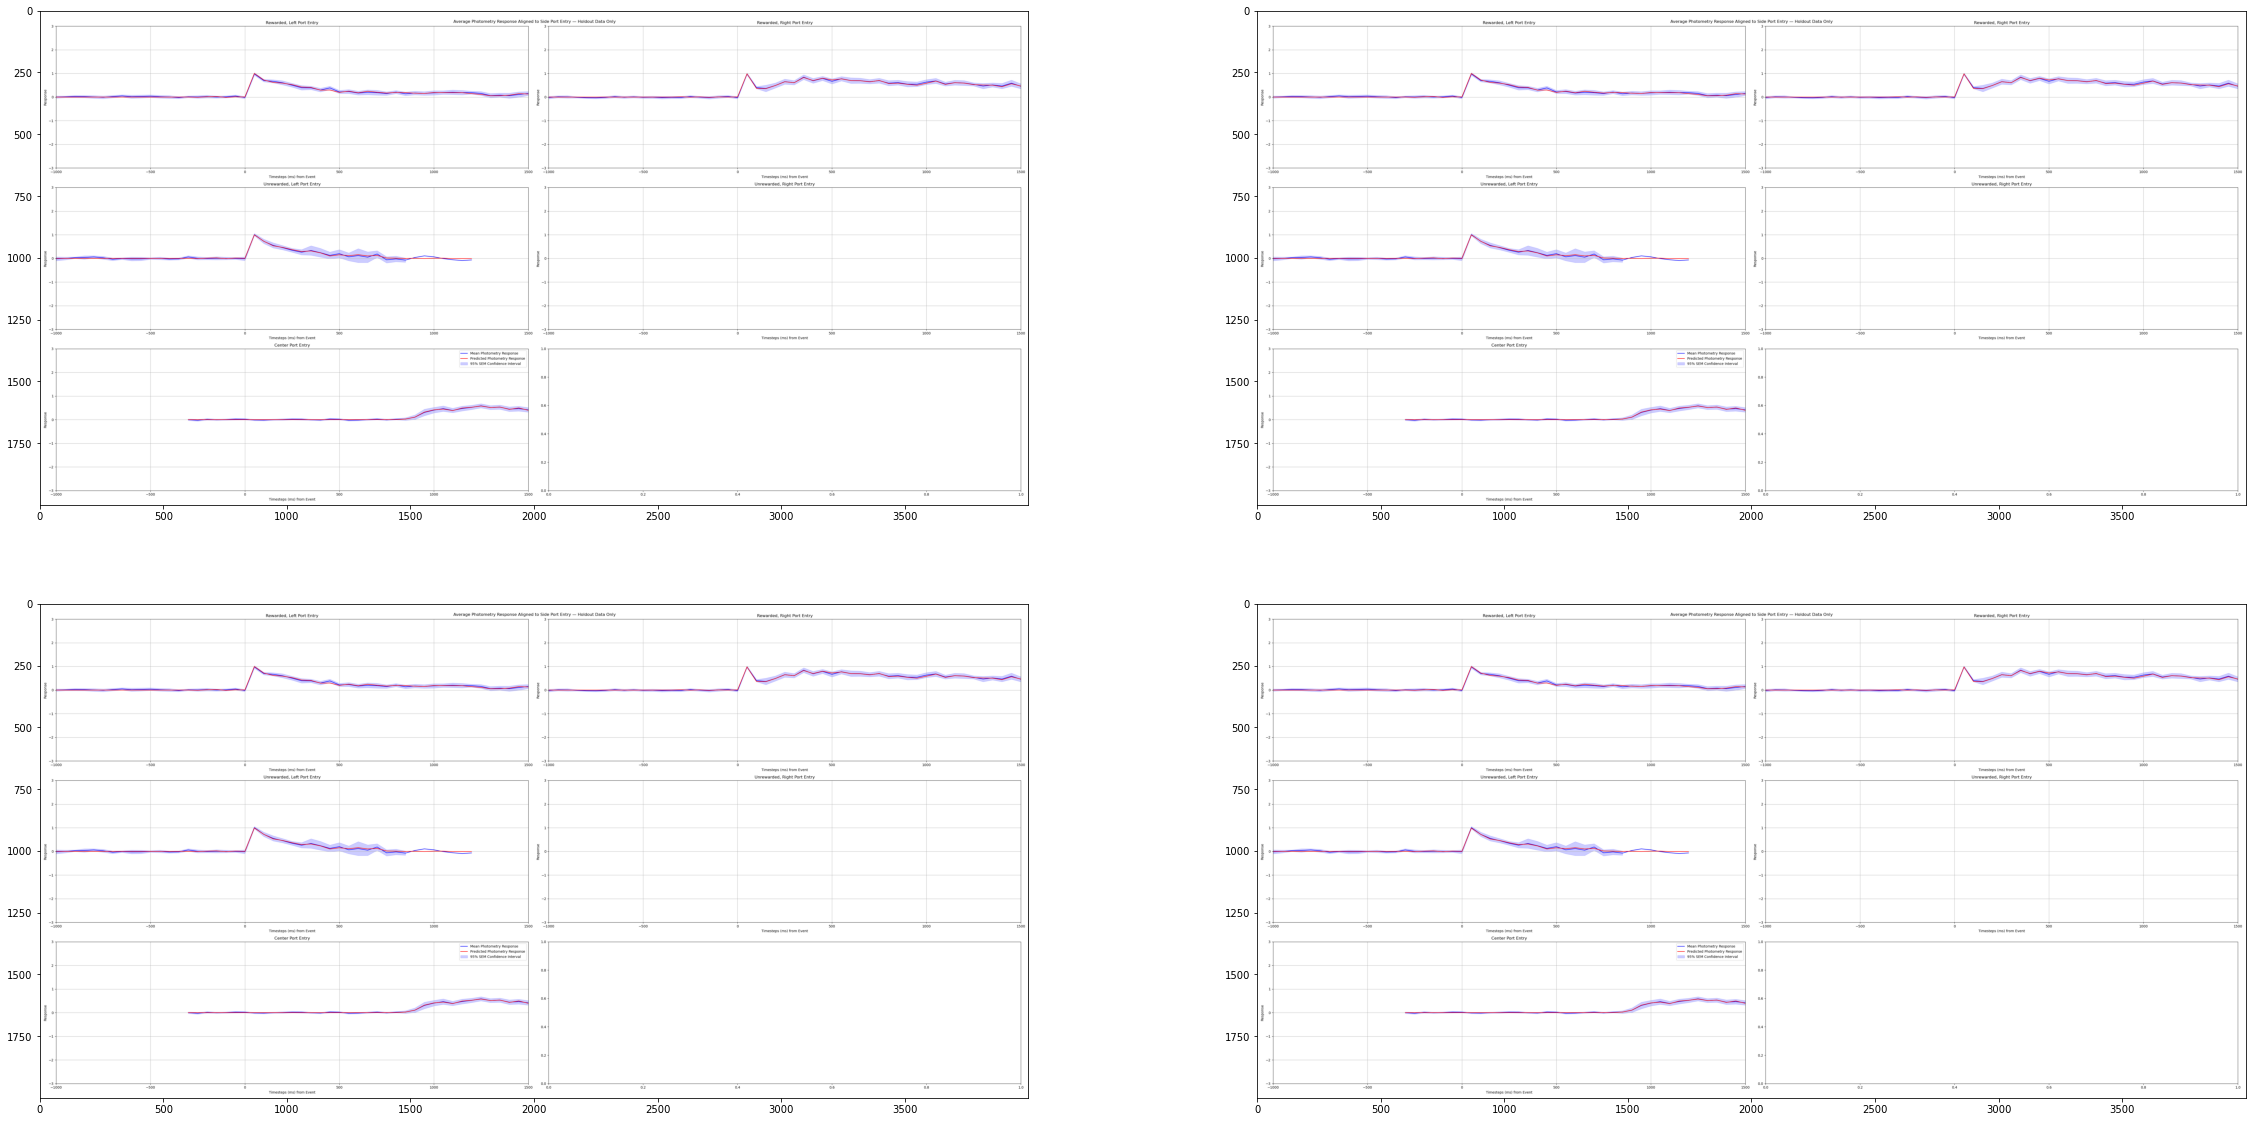

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
counter = -1
for ibf, avg_fn in enumerate([_ for _ in sorted(best_avg['full_fn']) if '12212020' in _]):
    if ibf%4 == 0:
        print([_ for _ in sorted(best_avg['full_fn']) if '12212020' in _][ibf])
        if ibf != 0:
            plt.show()
        fig,ax = plt.subplots(2, 2,figsize=(40,20))
        counter += 1
    else:
        pass

    img = mpimg.imread(avg_fn)
    ax[ibf//2 - counter*2, ibf%2].imshow(img)

    # if ibf >= 7:
    #     break